In [1]:
import numpy as np
import matplotlib as plt
from qutip import *

In [52]:
maxPhoton = 3
maxCav = 4
theta = np.pi /2
J = 1.0
U = 0
theta = theta/maxCav
#定义常数
vac = basis(maxPhoton,0)
adown = destroy(maxPhoton)
adown_list = []
aup = create(maxPhoton)
aup_list = []
num = aup*adown
num_list = []
#定义了单体产生湮灭算符、粒子数算符、真空态
for n in range(maxCav):
    op_list = []
    for m in range(maxCav):
        op_list.append(qeye(maxPhoton))
    op_list[n] = adown
    adown_list.append(tensor(op_list))
    op_list[n] = aup
    aup_list.append(tensor(op_list))
    op_list[n] = num
    num_list.append(tensor(op_list))
#定义了多体产生湮灭算符、粒子数算符
op_list = []
for m in range(maxCav):
        op_list.append(vac)
vac = tensor(op_list)
#定义了多体真空态
H = 0
for n in range(maxCav):
    startsite = n
    targetsite = n+1
    if startsite == maxCav-1:
        targetsite = 0
    #如果是最后一个格点，下一个格点将是第一个
    temp = aup_list[targetsite]*adown_list[startsite]
    H += J * (np.exp(1j*theta)*temp +np.exp(-1j*theta)* temp.dag())
#     H +=J * (temp + temp.dag())
    H += 0.5*U*(num_list[n]*num_list[n]-num_list[n])
#定义了哈密顿
psi0 = aup_list[0]*vac

In [53]:
t = np.linspace(1,6,2000)
result = mesolve(H,psi0,t,[],num_list)

In [54]:
result.expect

[array([ 1.        ,  0.99998749,  0.99994995, ...,  0.77226264,
         0.77197938,  0.77167525]),
 array([  0.00000000e+00,   6.25621386e-06,   2.50243456e-05, ...,
          1.08701292e-01,   1.08735974e-01,   1.08780930e-01]),
 array([  0.00000000e+00,   1.95702714e-11,   3.13649356e-10, ...,
          1.03347761e-02,   1.05486761e-02,   1.07628871e-02]),
 array([  0.00000000e+00,   6.25621386e-06,   2.50243456e-05, ...,
          1.08701292e-01,   1.08735974e-01,   1.08780930e-01])]

In [55]:
fig , ax = plt.pyplot.subplots()

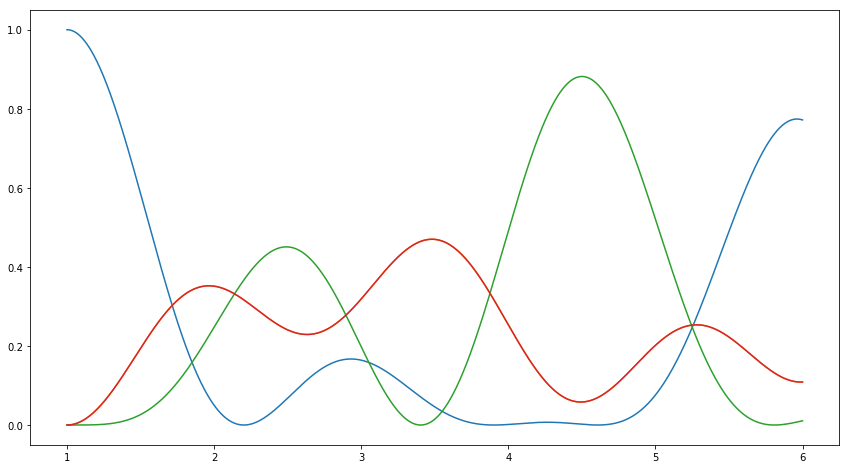

In [56]:
for i in range(maxCav):
    ax.plot(t,result.expect[i])
fig.set_size_inches(14.5, 8)
fig

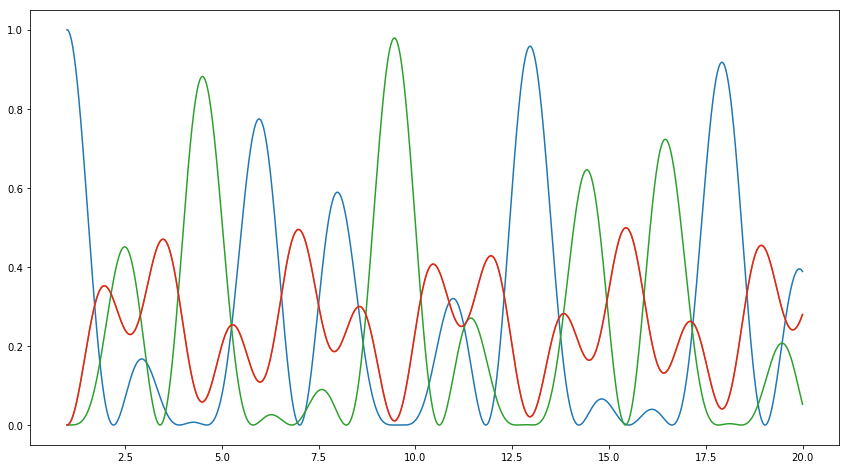

In [18]:
for i in range(maxCav):
    ax.plot(t,result.expect[i])
fig.set_size_inches(14.5, 8)
fig

In [25]:
ax.clear()

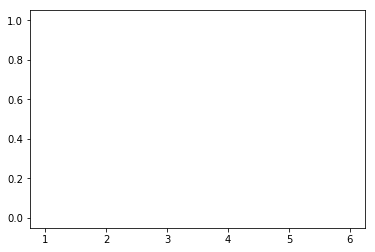

In [111]:
fig

In [ ]:
create